![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

##### Importando as bibliotecas, importando os dados e fazendo ajustes para deixar a base pronta para uso

In [256]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
import numpy as np

X_train = pd.read_csv('X_train_final.csv')
X_test = pd.read_csv('X_test_final.csv')

y_train = pd.read_fwf('./train/y_train.txt', header=None)
y_test = pd.read_fwf('./test/y_test.txt', header=None)

In [257]:
X_train.reset_index(inplace=True)
X_train.drop(columns=["Individual"], inplace=True)

X_test.reset_index(inplace=True)
X_test.drop(columns=["Individual"], inplace=True)

In [258]:
X_train.drop(columns=['index'], inplace=True)
X_test.drop(columns=['index'], inplace=True)
X_train.drop(columns=['Unnamed: 0'], inplace=True)
X_test.drop(columns=['Unnamed: 0'], inplace=True)

In [259]:
X_train

,"('1 tBodyAcc-mean()-X',)","('2 tBodyAcc-mean()-Y',)","('3 tBodyAcc-mean()-Z',)","('4 tBodyAcc-std()-X',)","('5 tBodyAcc-std()-Y',)","('6 tBodyAcc-std()-Z',)","('7 tBodyAcc-mad()-X',)","('8 tBodyAcc-mad()-Y',)","('9 tBodyAcc-mad()-Z',)","('10 tBodyAcc-max()-X',)",...,"('552 fBodyBodyGyroJerkMag-meanFre',)","('553 fBodyBodyGyroJerkMag-skewnes',)","('554 fBodyBodyGyroJerkMag-kurtosi',)","('555 angle(tBodyAccMean,gravity)',)","('556 angle(tBodyAccJerkMean),grav',)","('557 angle(tBodyGyroMean,gravityM',)","('558 angle(tBodyGyroJerkMean,grav',)","('559 angle(X,gravityMean)',)","('560 angle(Y,gravityMean)',)","('561 angle(Z,gravityMean)',)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [261]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: total: 281 ms
Wall time: 288 ms


,"('1 tBodyAcc-mean()-X',)","('2 tBodyAcc-mean()-Y',)","('3 tBodyAcc-mean()-Z',)","('4 tBodyAcc-std()-X',)","('5 tBodyAcc-std()-Y',)","('6 tBodyAcc-std()-Z',)","('7 tBodyAcc-mad()-X',)","('8 tBodyAcc-mad()-Y',)","('9 tBodyAcc-mad()-Z',)","('10 tBodyAcc-max()-X',)",...,"('552 fBodyBodyGyroJerkMag-meanFre',)","('553 fBodyBodyGyroJerkMag-skewnes',)","('554 fBodyBodyGyroJerkMag-kurtosi',)","('555 angle(tBodyAccMean,gravity)',)","('556 angle(tBodyAccJerkMean),grav',)","('557 angle(tBodyGyroMean,gravityM',)","('558 angle(tBodyGyroJerkMean,grav',)","('559 angle(X,gravityMean)',)","('560 angle(Y,gravityMean)',)","('561 angle(Z,gravityMean)',)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


### 1. Base de treino original

In [263]:
pca = PCA()

n_componentes = X_train.shape[1]

princomp = pca.fit(X_train)

componentes = princomp.transform(X_train)

nomes_pca = ['CP'+str(x+1) for x in list(range(n_componentes))]

principalDf = pd.DataFrame(data = componentes
             , columns = nomes_pca)

In [264]:
principalDf.head()

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,...,CP552,CP553,CP554,CP555,CP556,CP557,CP558,CP559,CP560,CP561
0,-5.516299,0.288581,1.532411,-1.396316,1.352138,0.224177,0.577473,0.687974,-1.226222,-0.369438,...,-1.265715e-09,4.666836e-10,-5.199917e-10,5.983087e-10,1.999729e-09,-4.500146e-09,2.559661e-10,-1.888686e-09,-4.314573e-09,-2.344553e-09
1,-5.531271,0.080497,1.926008,-0.699217,0.636850,-0.767131,-0.577610,-0.769831,-0.614337,-0.899785,...,-3.726207e-09,5.018592e-10,3.068630e-09,2.127223e-09,-5.268625e-09,2.167977e-09,1.937213e-09,-2.244993e-09,-1.946984e-09,-2.436856e-09
2,-5.470755,-0.289892,2.144259,-0.539911,0.178710,0.038023,0.059023,0.095223,-0.060588,-0.218113,...,4.592043e-09,6.365942e-10,-1.459423e-09,-1.638572e-09,-1.767864e-09,3.787793e-09,1.763207e-09,7.391072e-10,-4.238004e-10,5.893113e-10
3,-5.673483,-0.898107,2.017040,-0.186469,0.757886,-1.093225,-0.228544,-0.716186,0.281155,0.468406,...,2.465939e-09,-4.128315e-09,2.541173e-09,1.034466e-09,-3.578457e-10,-1.691032e-09,7.049702e-09,1.901177e-09,3.583667e-10,-6.801791e-09
4,-5.745261,-1.164046,2.138468,-0.226610,0.465133,-0.468495,-0.136545,-0.099238,0.290214,0.539894,...,6.672289e-10,3.952893e-09,1.223117e-10,9.018052e-11,-3.365241e-09,3.638235e-09,-3.240675e-09,5.292891e-11,-4.108932e-09,-1.107135e-09


In [265]:
princomp.explained_variance_ratio_

array([6.25420355e-01, 4.90825654e-02, 4.12873584e-02, 1.86685652e-02,
       1.69209520e-02, 1.26950747e-02, 1.17506905e-02, 1.06836868e-02,
       9.72024245e-03, 8.59744820e-03, 7.62088516e-03, 6.73287572e-03,
       5.78922169e-03, 5.58662769e-03, 4.99920448e-03, 4.74335867e-03,
       4.67394523e-03, 4.32502741e-03, 4.26529879e-03, 4.10321534e-03,
       3.94451500e-03, 3.75207689e-03, 3.50612078e-03, 3.39611156e-03,
       3.29979364e-03, 3.19577680e-03, 3.02040258e-03, 2.92010806e-03,
       2.88717661e-03, 2.82298608e-03, 2.76248391e-03, 2.63464631e-03,
       2.55540788e-03, 2.36151942e-03, 2.30224317e-03, 2.23728405e-03,
       2.22867442e-03, 2.10315110e-03, 2.08601048e-03, 2.04815008e-03,
       1.92442900e-03, 1.87638075e-03, 1.80146135e-03, 1.79254714e-03,
       1.72163502e-03, 1.59939151e-03, 1.56918120e-03, 1.56711864e-03,
       1.52735482e-03, 1.50583987e-03, 1.44669755e-03, 1.40620523e-03,
       1.36949091e-03, 1.27038698e-03, 1.25466750e-03, 1.19644618e-03,
      

In [266]:
princomp.explained_variance_ratio_.cumsum()

array([0.62542035, 0.67450292, 0.71579028, 0.73445884, 0.7513798 ,
       0.76407487, 0.77582556, 0.78650925, 0.79622949, 0.80482694,
       0.81244782, 0.8191807 , 0.82496992, 0.83055655, 0.83555575,
       0.84029911, 0.84497306, 0.84929808, 0.85356338, 0.8576666 ,
       0.86161111, 0.86536319, 0.86886931, 0.87226542, 0.87556522,
       0.87876099, 0.8817814 , 0.8847015 , 0.88758868, 0.89041167,
       0.89317415, 0.8958088 , 0.8983642 , 0.90072572, 0.90302797,
       0.90526525, 0.90749393, 0.90959708, 0.91168309, 0.91373124,
       0.91565567, 0.91753205, 0.91933351, 0.92112606, 0.92284769,
       0.92444708, 0.92601626, 0.92758338, 0.92911074, 0.93061658,
       0.93206327, 0.93346948, 0.93483897, 0.93610936, 0.93736402,
       0.93856047, 0.93974526, 0.94089815, 0.94202809, 0.94312654,
       0.94420227, 0.94525172, 0.94629355, 0.94731112, 0.94830217,
       0.94926686, 0.9502214 , 0.95114077, 0.95202568, 0.95290826,
       0.95376105, 0.95459488, 0.95541934, 0.95622885, 0.95701

In [267]:

index = np.argmax(princomp.explained_variance_ratio_.cumsum() > 0.90)

count = index + 1

print(f"O número de componentes que explica 90% da variância é: {count}")

O número de componentes que explica 90% da variância é: 34


### 2. Base de treino padronizada

In [269]:
n_componentes = X_train_pad.shape[1]

princomp_pad = pca.fit(X_train_pad)

componentes_pad = princomp.transform(X_train_pad)

nomes_pca_pad = ['CP'+str(x+1) for x in list(range(n_componentes))]

principalDf_pad = pd.DataFrame(data = componentes
             , columns = nomes_pca)

In [270]:
princomp_pad.explained_variance_ratio_

array([5.07762499e-01, 6.58208270e-02, 2.80671526e-02, 2.49180460e-02,
       1.89615454e-02, 1.71574564e-02, 1.37175143e-02, 1.19853399e-02,
       9.94612415e-03, 9.64301075e-03, 8.55329129e-03, 7.98715767e-03,
       7.62642062e-03, 6.43792621e-03, 6.30769824e-03, 5.99672662e-03,
       5.84981821e-03, 5.73196854e-03, 5.68508123e-03, 5.27099551e-03,
       5.00248378e-03, 4.88267848e-03, 4.78019111e-03, 4.68205101e-03,
       4.49114748e-03, 4.20086828e-03, 4.17687891e-03, 4.05514924e-03,
       3.88252869e-03, 3.86168269e-03, 3.65814870e-03, 3.54460971e-03,
       3.47841791e-03, 3.37358028e-03, 3.29594118e-03, 3.27717602e-03,
       3.20104085e-03, 2.95824262e-03, 2.86328370e-03, 2.84365942e-03,
       2.68652034e-03, 2.64874778e-03, 2.63175869e-03, 2.58385409e-03,
       2.48733016e-03, 2.46314167e-03, 2.40582907e-03, 2.36074840e-03,
       2.30761185e-03, 2.27407469e-03, 2.20547427e-03, 2.12947904e-03,
       2.07458219e-03, 2.02398626e-03, 1.99453240e-03, 1.97665111e-03,
      

In [271]:
princomp_pad.explained_variance_ratio_.cumsum()

array([0.5077625 , 0.57358333, 0.60165048, 0.62656852, 0.64553007,
       0.66268753, 0.67640504, 0.68839038, 0.6983365 , 0.70797952,
       0.71653281, 0.72451996, 0.73214638, 0.73858431, 0.74489201,
       0.75088874, 0.75673855, 0.76247052, 0.7681556 , 0.7734266 ,
       0.77842908, 0.78331176, 0.78809195, 0.792774  , 0.79726515,
       0.80146602, 0.8056429 , 0.80969805, 0.81358058, 0.81744226,
       0.82110041, 0.82464502, 0.82812344, 0.83149702, 0.83479296,
       0.83807013, 0.84127117, 0.84422942, 0.8470927 , 0.84993636,
       0.85262288, 0.85527163, 0.85790339, 0.86048724, 0.86297457,
       0.86543771, 0.86784354, 0.87020429, 0.8725119 , 0.87478598,
       0.87699145, 0.87912093, 0.88119551, 0.8832195 , 0.88521403,
       0.88719068, 0.88913274, 0.89103524, 0.89291234, 0.89477612,
       0.89658889, 0.89836314, 0.90012358, 0.90185705, 0.90356458,
       0.9052507 , 0.90690423, 0.90853529, 0.91011697, 0.91168993,
       0.91322027, 0.91473947, 0.91621836, 0.91768032, 0.91912

In [272]:

index = np.argmax(princomp_pad.explained_variance_ratio_.cumsum() > 0.90)

count = index + 1

print(f"O número de componentes que explica 90% da variância é: {count}")

O número de componentes que explica 90% da variância é: 63


### Plotando no gráfico (Dataframe Original)

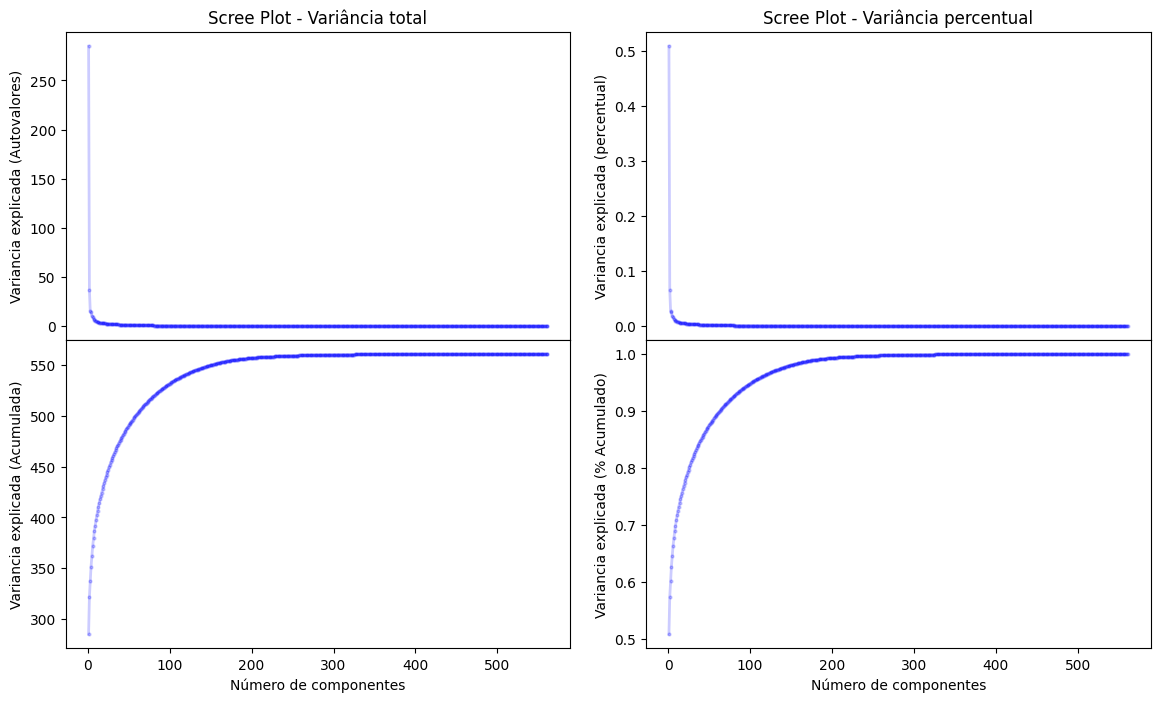

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

ampli_y1 = princomp.explained_variance_[0]

num_componentes = np.arange(princomp.n_components_) + 1
ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')


ampli_y2 = princomp.explained_variance_ratio_[0]
# ax[1].set_ylim(-ampli_y2*.05, ampli_y2*1.1)

ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

plt.show()

### Plotando no gráfico (Dataframe Padronizado)

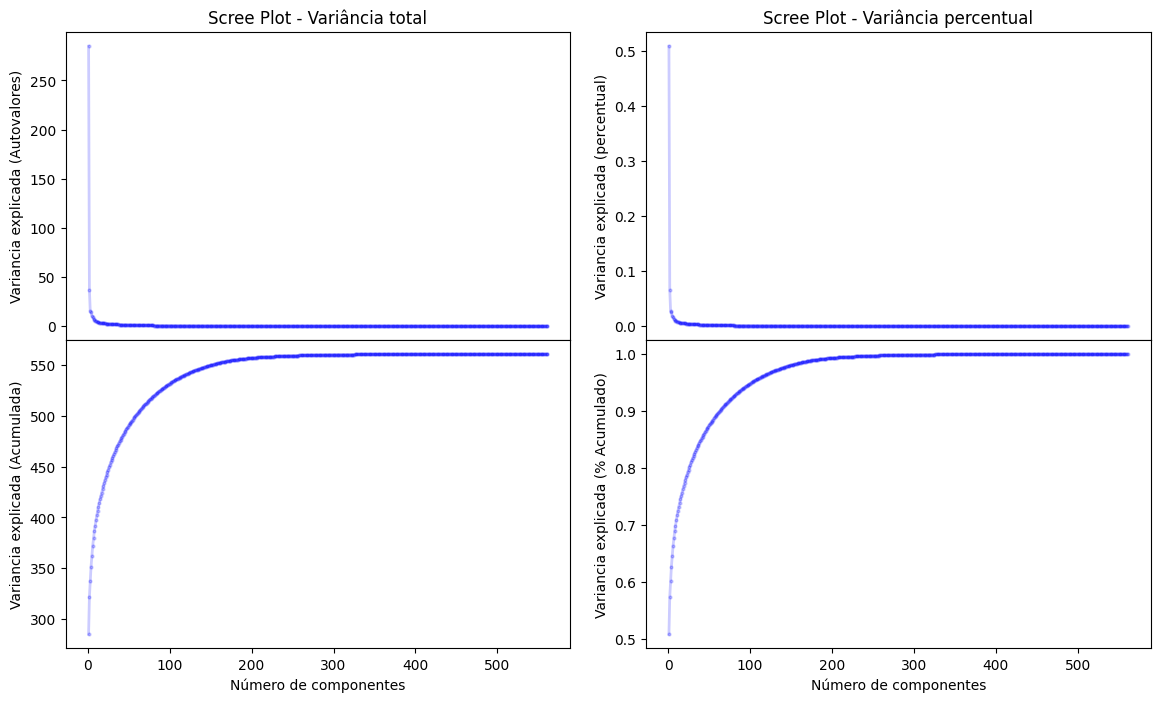

In [276]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

ampli_y2 = princomp_pad.explained_variance_[0]

num_componentes = np.arange(princomp_pad.n_components_) + 1
ax[0,0].plot(num_componentes, princomp_pad.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

ax[1,0].plot(num_componentes, princomp_pad.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')


ampli_y2 = princomp_pad.explained_variance_ratio_[0]
# ax[1].set_ylim(-ampli_y2*.05, ampli_y2*1.1)

ax[0,1].plot(num_componentes, princomp_pad.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

ax[1,1].plot(num_componentes, princomp_pad.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

plt.show()

### Variância explicada (% acumulada) de ambos os sets

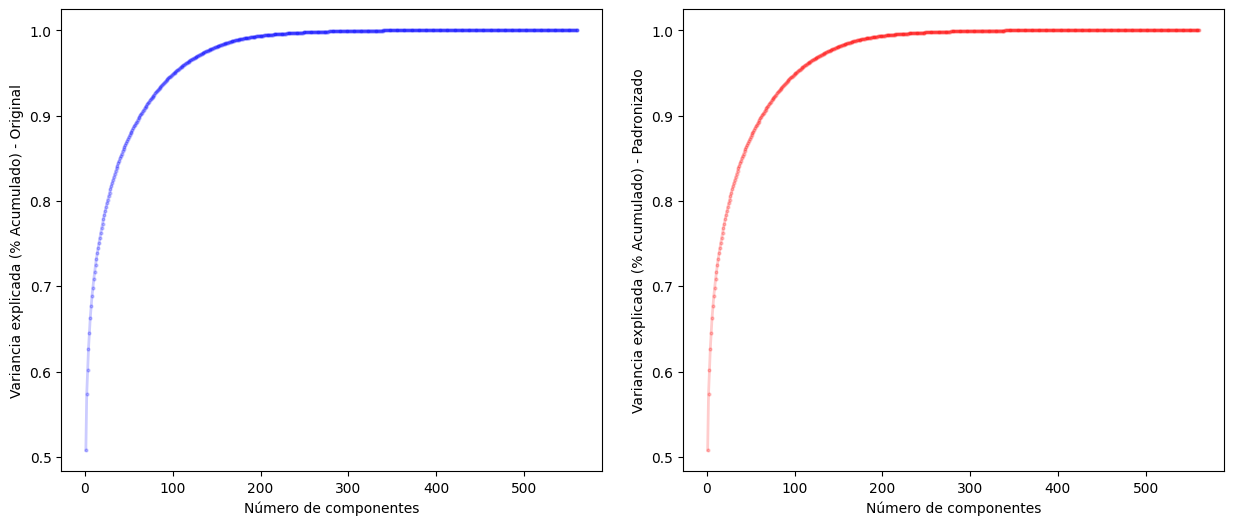

In [278]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 6))
plt.subplots_adjust(hspace=0, wspace=.15)



num_componentes = np.arange(princomp.n_components_) + 1
num_componentes_pad = np.arange(princomp_pad.n_components_) + 1

ampli_y1 = princomp.explained_variance_ratio_[0]

ax[0].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0].set_xlabel('Número de componentes')
ax[0].set_ylabel('Variancia explicada (% Acumulado) - Original')



ampli_y2 = princomp_pad.explained_variance_ratio_[0]

ax[1].plot(num_componentes_pad, princomp_pad.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='red', markersize=2, alpha=.2)
ax[1].set_xlabel('Número de componentes')
ax[1].set_ylabel('Variancia explicada (% Acumulado) - Padronizado')

plt.show()

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

### 1. Dataframe Original

In [281]:
prcomp = PCA().fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste = prcomp.transform(X_test)

In [282]:
n =  10

In [283]:
colunas = ['cp' + str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test = pd.DataFrame(pc_teste[:,:n], columns = colunas)

pc_train.shape

(7352, 10)

In [284]:
%%time

clf = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001).fit(pc_train, y_train)

CPU times: total: 453 ms
Wall time: 105 ms


In [285]:
train_scores = clf.score(pc_train, y_train)
test_scores  = clf.score(pc_test, y_test)

In [286]:
print('Accuracy na base de treino: ' + str(train_scores))
print('Accuracy na base de testes: ' + str(test_scores))

Accuracy na base de treino: 0.8865614798694232
Accuracy na base de testes: 0.8025110281642348


### 2. Dataframe Padronizado

In [324]:
prcomp = PCA().fit(X_train_pad)

pc_treino = prcomp.transform(X_train_pad)
pc_teste = prcomp.transform(X_test_pad)

In [326]:
n =  10

In [328]:
colunas = ['cp' + str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test = pd.DataFrame(pc_teste[:,:n], columns = colunas)

pc_train.shape

(7352, 10)

In [330]:
%%time

clf = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001).fit(pc_train, y_train)

CPU times: total: 78.1 ms
Wall time: 104 ms


In [331]:
train_scores = clf.score(pc_train, y_train)
test_scores  = clf.score(pc_test, y_test)

In [333]:
print('Accuracy na base de treino: ' + str(train_scores))
print('Accuracy na base de testes: ' + str(test_scores))

Accuracy na base de treino: 0.8567736670293797
Accuracy na base de testes: 0.7872412623006447


### Para o dataframe original, a acurácia de treino foi de 88,6% enquanto a acurácia de teste foi de 80,2%, representando um queda expressiva, porém com valores satisfatórios de acurácia para o número de componentes principais escolhidos.

### Para o dataframe padronizado, temos uma queda geral na acurácia, com 85,6% na base de treino e 78,7% na base de testes. Ainda estou investigando o possível motivo da queda nesse modelo padronizado, porém, acredito que seja por conta das 10 primeiras componentes serem mais "fracas" para esse modelo, ou seja, ele precisa de um número bem maior de componentes para fazer a mesma coisa que o dataset original.